In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 5]

import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter('ignore')

from nltk.probability import FreqDist

from wordcloud import WordCloud

from gensim.corpora import Dictionary
from gensim.models.ldamulticore import LdaMulticore

import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()

from tqdm.auto import tqdm
tqdm.pandas()

In [2]:
df = pd.read_csv('Cleaned Tweets - Topic Modelling.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3735462 entries, 0 to 3735461
Data columns (total 5 columns):
 #   Column    Dtype 
---  ------    ----- 
 0   tweetid   int64 
 1   text      object
 2   hashtags  object
 3   language  object
 4   date      object
dtypes: int64(1), object(4)
memory usage: 142.5+ MB


In [3]:
df.head()

,tweetid,text,hashtags,language,date
0,1499174584720969730,"['map', 'situat', 'ukrain', 'seventh', 'day', ...","['Ukraine', 'RussiaUkraineConflict']",en,MAR03
1,1499174584976826368,"['ukrain', 'let', 'say', 'take', 'russian', 's...",['Ukraine'],en,MAR03
2,1499174585073242116,"['swift', 'compani', 'confirm', 'disconnect', ...","['EU', 'Russian']",en,MAR03
3,1499174585987600384,"['ukrain', 'ukrainian', 'forc', 'recov', 'enik...",['Ukraine'],en,MAR03
4,1499174586159665155,"['volunt', 'need', 'dh', 'digitalhuman', 'inte...","['DH', 'DigitalHumanities', 'CulturalHeritage']",en,MAR03


In [4]:
df['text'] = df.text.progress_apply(eval)
df['hashtags'] = df.hashtags.progress_apply(eval)

  0%|          | 0/3735462 [00:00<?, ?it/s]

  0%|          | 0/3735462 [00:00<?, ?it/s]

In [5]:
all_words = [word for tokens in df['text'] for word in tokens]
tweet_lengths = [len(tokens) for tokens in df['text']]
vocab = sorted(list(set(all_words)))

print(f'{len(all_words)} words total, with a vocabulary size of {len(vocab)}')
print(f'Max tweet length is {max(tweet_lengths)}')

60909435 words total, with a vocabulary size of 292565
Max tweet length is 72


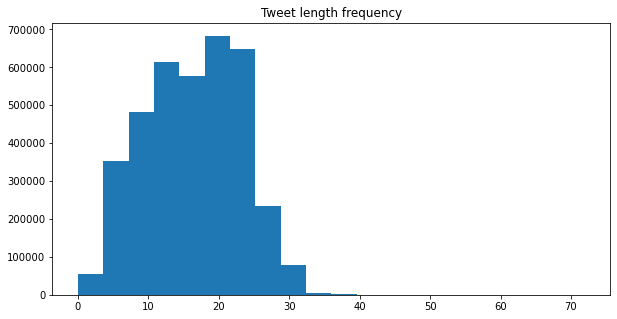

In [6]:
plt.hist(tweet_lengths, bins=20)
plt.title("Tweet length frequency")
plt.show()

In [7]:
word_freq = FreqDist(all_words)
word_freq.most_common(100)

[('ukrain', 2841598),
 ('russia', 1355833),
 ('russian', 941289),
 ('putin', 815104),
 ('war', 552171),
 ('ukrainian', 494677),
 ('amp', 446751),
 ('peopl', 413656),
 ('stop', 347744),
 ('standwithukrain', 327395),
 ('need', 299674),
 ('nato', 292844),
 ('kyiv', 284243),
 ('world', 273730),
 ('civilian', 271697),
 ('ukrainerussiawar', 247336),
 ('us', 247223),
 ('ukrainerussianwar', 237260),
 ('weapon', 234017),
 ('stopputin', 232971),
 ('support', 227727),
 ('provid', 225388),
 ('humanitarian', 215899),
 ('defend', 214668),
 ('countri', 206446),
 ('potu', 204886),
 ('one', 203512),
 ('help', 189210),
 ('innoc', 178872),
 ('like', 173944),
 ('death', 173922),
 ('forc', 173376),
 ('day', 170917),
 ('assist', 170251),
 ('go', 164281),
 ('today', 162193),
 ('safeairliftukrain', 161104),
 ('russianukrainianwar', 150037),
 ('citi', 145522),
 ('say', 136138),
 ('kill', 135849),
 ('militari', 135259),
 ('invas', 131935),
 ('kharkiv', 131733),
 ('video', 124783),
 ('children', 124370),
 ('time

In [8]:
top_50_dictionary = {i[0]:i[1] for i in word_freq.most_common(50)}

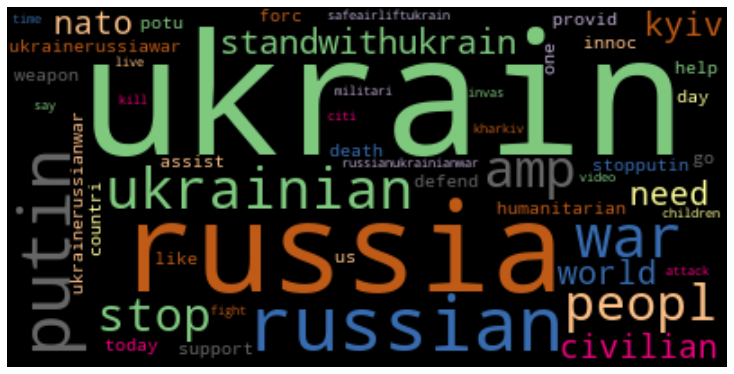

In [9]:
wordcloud = WordCloud(colormap = 'Accent', background_color = 'black').generate_from_frequencies(top_50_dictionary)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)

plt.show()

In [10]:
%%time
text_dict = Dictionary(df.text)

tweets_bow = [text_dict.doc2bow(tweet) for tweet in df['text']]

CPU times: user 1min 7s, sys: 772 ms, total: 1min 7s
Wall time: 1min 7s


In [11]:
%%time
tweets_lda = LdaMulticore(tweets_bow,
                          num_topics = 10,
                          id2word = text_dict,
                          workers = 4,
                          random_state = 42,
                          passes=1)

tweets_lda.show_topics()

[(0, '0.042*"ukrain" + 0.023*"student" + 0.020*"border" + 0.018*"indian" + 0.018*"poland" + 0.017*"evacu" + 0.016*"amp" + 0.013*"refuge" + 0.011*"india" + 0.010*"team"'), (1, '0.070*"ukrain" + 0.023*"support" + 0.022*"help" + 0.022*"peopl" + 0.019*"standwithukrain" + 0.017*"nuclear" + 0.016*"plant" + 0.015*"ukrainian" + 0.014*"power" + 0.013*"pleas"'), (2, '0.050*"ukrain" + 0.044*"russian" + 0.023*"russia" + 0.020*"forc" + 0.015*"ukrainian" + 0.012*"citi" + 0.011*"mariupol" + 0.011*"kharkiv" + 0.010*"kyiv" + 0.010*"armi"'), (3, '0.063*"close" + 0.063*"ukrain" + 0.056*"nato" + 0.053*"stoprussia" + 0.047*"sky" + 0.043*"russia" + 0.036*"stopputin" + 0.026*"russian" + 0.024*"stop" + 0.023*"un"'), (4, '0.062*"weapon" + 0.059*"provid" + 0.059*"defend" + 0.059*"humanitarian" + 0.059*"putin" + 0.058*"stop" + 0.057*"need" + 0.057*"ukrain" + 0.056*"potu" + 0.056*"civilian"'), (5, '0.056*"russia" + 0.047*"ukrain" + 0.016*"nato" + 0.014*"russian" + 0.011*"amp" + 0.009*"eu" + 0.008*"invas" + 0.008*

In [12]:
vis = gensimvis.prepare(tweets_lda, tweets_bow, dictionary=tweets_lda.id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
6      0.100806  0.057772       1        1  19.785225
5      0.114072  0.071207       2        1  16.922213
2      0.116470  0.022776       3        1  14.400777
1      0.115128  0.007604       4        1  10.964014
7      0.065438 -0.008268       5        1   8.837900
9      0.017783  0.084567       6        1   7.441908
4     -0.390384  0.121934       7        1   6.384535
0      0.125086  0.079651       8        1   6.366175
8     -0.024063 -0.397112       9        1   4.472928
3     -0.240336 -0.040131      10        1   4.424324, topic_info=             Term          Freq         Total Category  logprob  loglift
90          putin  8.768360e+05  8.768360e+05  Default  30.0000  30.0000
11        russian  9.948080e+05  9.948080e+05  Default  29.0000  29.0000
920          nato  4.092580e+05  4.092580e+05  Default  28.0000  28.0000
78         russia  1.346273e+06  1.346273e+06  Default  27.0000  27.0000
121          stop  3.697540e+05  3.697540e+05  Default  26.0000  26.0000
..            ...           ...           ...      ...      ...      ...
212         peopl  5.342957e+04  4.325435e+05  Topic10  -3.9207   1.0267
11        russian  7.039696e+04  9.948088e+05  Topic10  -3.6449   0.4697
563          potu  3.189337e+04  2.510681e+05  Topic10  -4.4367   1.0547
646  stopputinnow  2.639873e+04  1.199072e+05  Topic10  -4.6258   1.6047
156           amp  1.944184e+04  4.268411e+05  Topic10  -4.9317   0.0291

[724 rows x 6 columns], token_table=       Topic      Freq      Term
term                            
3987       3  0.999910  accident
6554       1  0.999933    actnow
18449      5  0.000194  aeroflot
18449      8  0.999746  aeroflot
2001       2  0.999899    affair
...      ...       ...       ...
398        3  0.002848      zone
398        4  0.057021      zone
398        5  0.000041      zone
398        8  0.023546      zone
4860       3  0.999947      zoom

[1862 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[7, 6, 3, 2, 8, 10, 5, 1, 9, 4])